Objective:
The aim of this project is to analyze the accident report on different state road. The analysis will focus on the comparison of number of accidents in two different years, highest accidents in a year, fatal accidents per lakh effective kilometer.
The data will be visualized using various types of graphs.

**Data Cleaning**  
Let's proceed with cleaning the data by checking for:  

1. Missing values  
2. Duplicates  
3. Outliers  

In [8]:
import pandas as pd

df = pd.read_csv('Accident-data.csv')

# Step 1: Basic Exploration
print("Initial Dataset Info:")
df.info()
print("\nInitial Summary Statistics:\n", df.describe())

Initial Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 12 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   S. No.                                                                   56 non-null     float64
 1   Name of State Road Transport Undertaking (SRTU)                          63 non-null     object 
 2   Number of Accidents - 2016-17                                            63 non-null     int64  
 3   Number of Accidents - 2015-16                                            63 non-null     int64  
 4    Number of Fatal Accidents - 2016-17                                     63 non-null     int64  
 5    Number of Fatal Accidents - 2015-16                                     63 non-null     int64  
 6   Effective Kilometres (Lakh)/Revenue Earning Kilometers

In [9]:
print("\nMissing Values:\n", df.isnull().sum())

# Step 2: Handling Missing Values
# Drop columns with a high percentage of missing values if they aren’t useful
missing_threshold = 0.5
df = df.dropna(thresh=int((1 - missing_threshold) * len(df)), axis=1)


# Step 3: Removing Duplicates
df.drop_duplicates(inplace=True)


Missing Values:
 S. No.                                                                     7
Name of State Road Transport Undertaking (SRTU)                            0
Number of Accidents - 2016-17                                              0
Number of Accidents - 2015-16                                              0
 Number of Fatal Accidents - 2016-17                                       0
 Number of Fatal Accidents - 2015-16                                       0
Effective Kilometres (Lakh)/Revenue Earning Kilometers (Lakh) - 2016-17    1
Effective Kilometres (Lakh)/Revenue Earning Kilometers (Lakh) - 2015-16    1
Number of Accidents per lakh Effective Kilometres - 2016-17                1
Number of Accidents per lakh Effective Kilometres - 2015-16                1
Number of Fatal Accidents per lakh Effective Kilometers - 2016-17          1
Number of Fatal Accidents per lakh Effective Kilometers - 2015-16          1
dtype: int64


In [10]:
# Step 5: Handling Outliers
for column in df.select_dtypes(include=['int64', 'float64']).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Step 6: Standardizing Text (optional)
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].str.strip().str.lower()

# Step 7: Drop Unnecessary Columns (optional)
df = df.drop(columns=['unnecessary_column1', 'unnecessary_column2'], errors='ignore')  # replace with actual column names

# Final Check
print("Cleaned Dataset Info:")
df.info()
print("\nCleaned Summary Statistics:\n", df.describe())
print("\nSample of Cleaned Data:\n", df.head())

Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 1 to 59
Data columns (total 12 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   S. No.                                                                   20 non-null     float64
 1   Name of State Road Transport Undertaking (SRTU)                          20 non-null     object 
 2   Number of Accidents - 2016-17                                            20 non-null     int64  
 3   Number of Accidents - 2015-16                                            20 non-null     int64  
 4    Number of Fatal Accidents - 2016-17                                     20 non-null     int64  
 5    Number of Fatal Accidents - 2015-16                                     20 non-null     int64  
 6   Effective Kilometres (Lakh)/Revenue Earning Kilometers (Lak

**Data Cleaning Observations:**  
1. There are no missing values in the dataset.  
2. No duplicate rows exist.  
3. No extreme outliers in the key variables like quantity, unitprice, and amount, although further analysis will confirm this.  

**Data Analysis Using Visualization**  
We will analyze the following:  
1. Distribution of product categories.  
2. Brand-wise sales.  
3. Rating analysis.  
4. Monthly purchasing trends.  

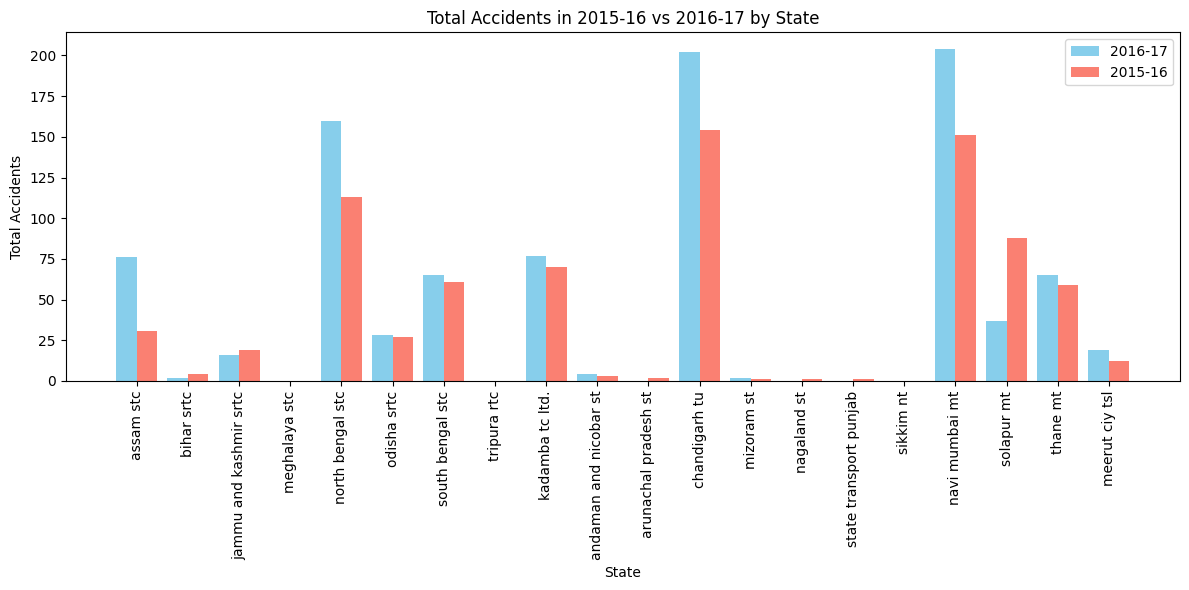

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data
file_path_csv = 'cleaned_accidents.csv'  # Update with the correct path if needed
data_csv = pd.read_csv(file_path_csv)

# 1. Total Accidents in 2015-16 vs. 2016-17
plt.figure(figsize=(12, 6))
states = data_csv['Name of State Road Transport Undertaking (SRTU)']
accidents_2016_17 = data_csv['Number of Accidents - 2016-17']
accidents_2015_16 = data_csv['Number of Accidents - 2015-16']

x = range(len(states))
width = 0.4  # Width of the bars

plt.bar(x, accidents_2016_17, width=width, label='2016-17', color='skyblue')
plt.bar([i + width for i in x], accidents_2015_16, width=width, label='2015-16', color='salmon')

plt.xlabel('State')
plt.ylabel('Total Accidents')
plt.title('Total Accidents in 2015-16 vs 2016-17 by State')
plt.xticks([i + width / 2 for i in x], states, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

Comparison between two years: We can clearly see which state has more accidents in which year.

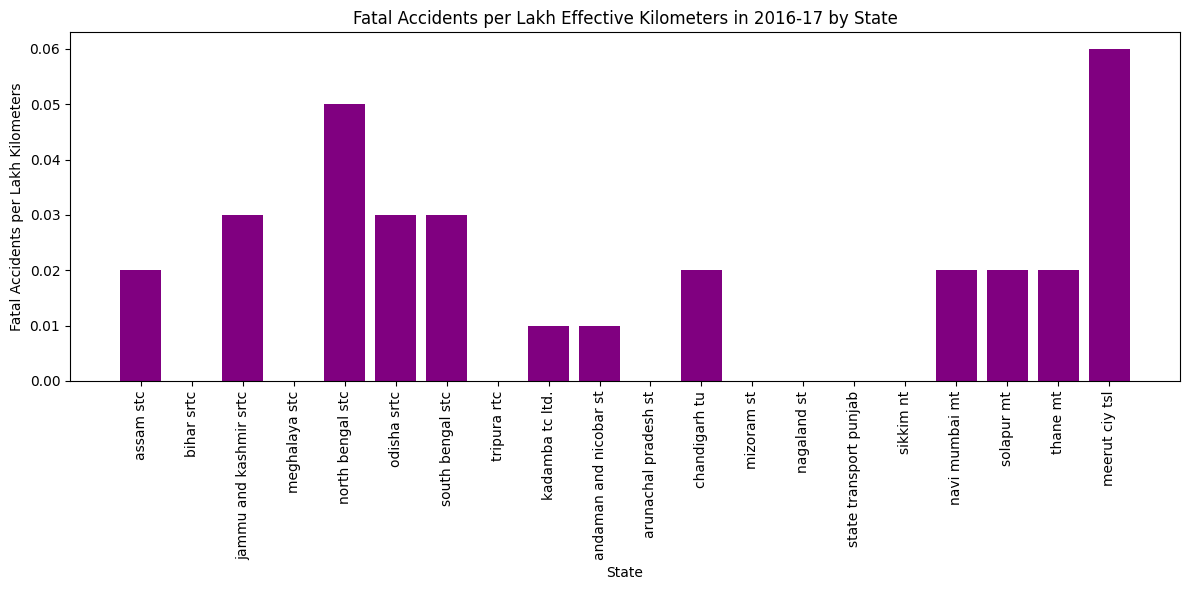

In [12]:
# 2. Fatal Accidents per Lakh Kilometers in 2016-17
plt.figure(figsize=(12, 6))
fatal_accidents_rate = data_csv['Number of Fatal Accidents per lakh Effective Kilometers - 2016-17']

plt.bar(states, fatal_accidents_rate, color='purple')
plt.xlabel('State')
plt.ylabel('Fatal Accidents per Lakh Kilometers')
plt.title('Fatal Accidents per Lakh Effective Kilometers in 2016-17 by State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

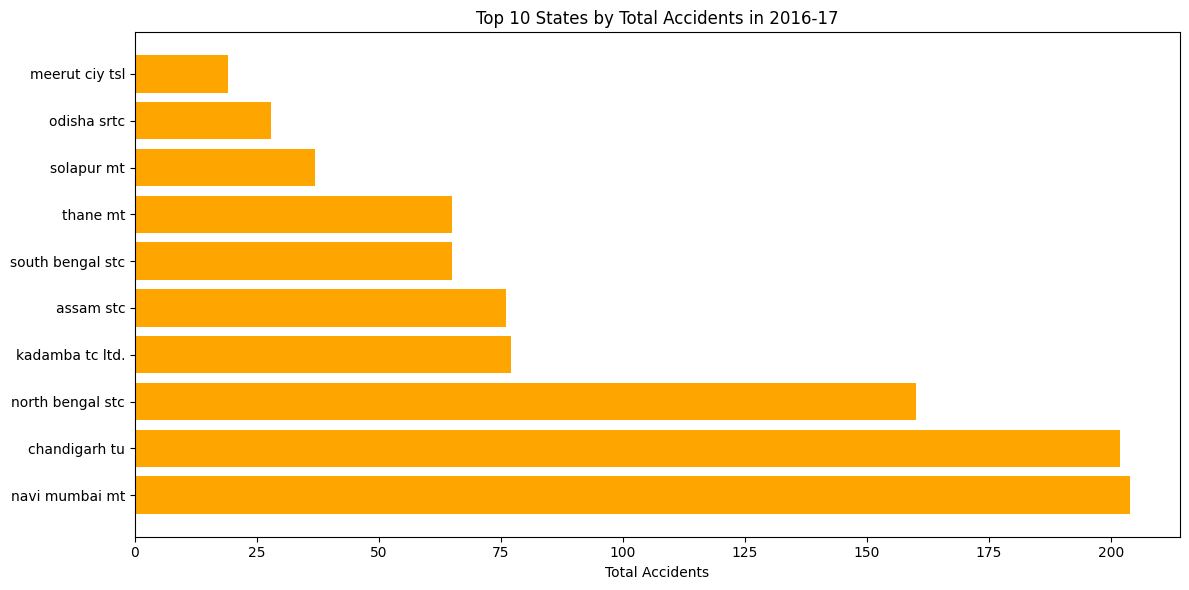

In [13]:
# 3. Top 10 States by Total Accidents in 2016-17
top_states = data_csv.nlargest(10, 'Number of Accidents - 2016-17')
plt.figure(figsize=(12, 6))

plt.barh(top_states['Name of State Road Transport Undertaking (SRTU)'], top_states['Number of Accidents - 2016-17'], color='orange')
plt.xlabel('Total Accidents')
plt.title('Top 10 States by Total Accidents in 2016-17')
plt.tight_layout()
plt.show()

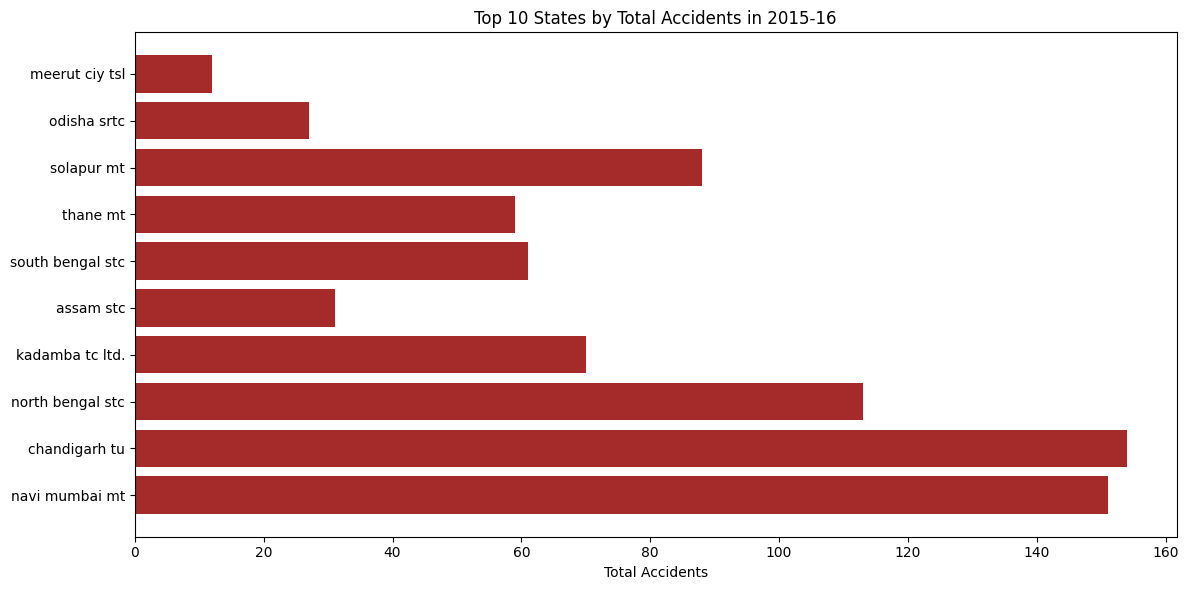

In [14]:
# 4. Top 10 States by Total Accidents in 2015-16
top_state = data_csv.nlargest(10, 'Number of Accidents - 2015-16')
plt.figure(figsize=(12, 6))

plt.barh(top_states['Name of State Road Transport Undertaking (SRTU)'], top_states['Number of Accidents - 2015-16'], color='brown')
plt.xlabel('Total Accidents')
plt.title('Top 10 States by Total Accidents in 2015-16')
plt.tight_layout()
plt.show()

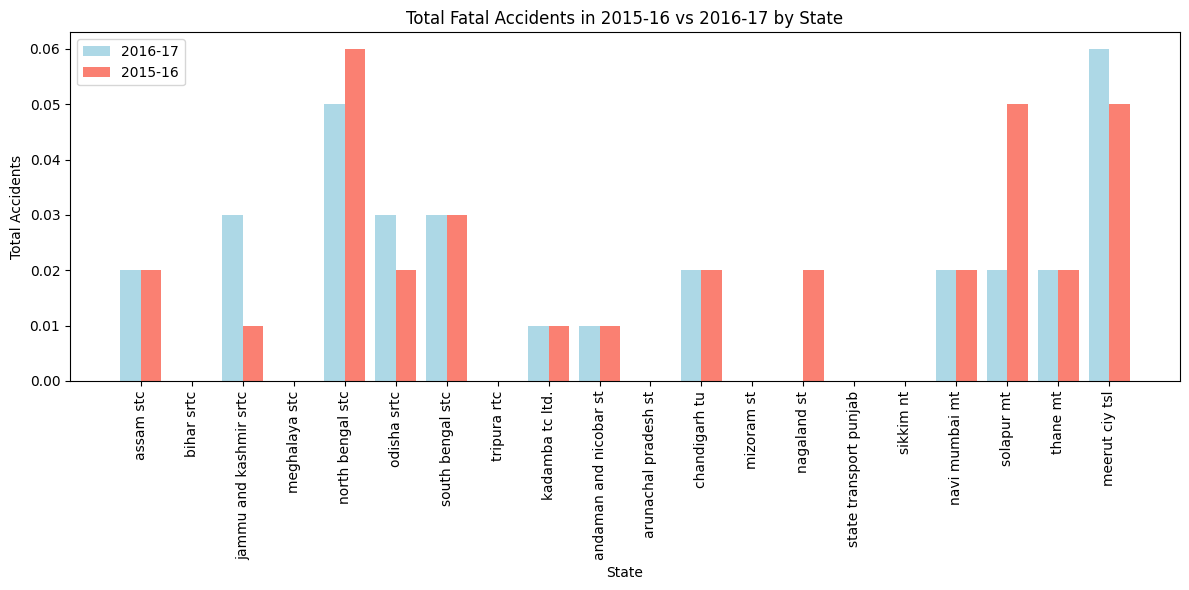

In [15]:

# 5. Total Fatal Accidents per lakh Effective Kilometers in 2015-16 vs. 2016-17
plt.figure(figsize=(12, 6))
states = data_csv['Name of State Road Transport Undertaking (SRTU)']
fatal_accidents_2016_17 = data_csv['Number of Fatal Accidents per lakh Effective Kilometers - 2016-17']
fatal_accidents_2015_16 = data_csv['Number of Fatal Accidents per lakh Effective Kilometers - 2015-16']

x = range(len(states))
width = 0.4  # Width of the bars

plt.bar(x, fatal_accidents_2016_17, width=width, label='2016-17', color='lightblue')
plt.bar([i + width for i in x], fatal_accidents_2015_16, width=width, label='2015-16', color='salmon')

plt.xlabel('State')
plt.ylabel('Total Accidents')
plt.title('Total Fatal Accidents in 2015-16 vs 2016-17 by State')
plt.xticks([i + width / 2 for i in x], states, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

Conclusion: From this dataset we can see how many accidents have happened on which state road, how many fatal accidents have happened and how many effective kilometers have there been. By looking at this we can see that we need more rules on which road.